# Trajectory analysis with PILOT

## 1 -  Description

<div class="alert alert-block alert-success",class="well" >
<b>PILOT</b>

<strong>Welcome to our extenting notebook for scRNA/pathomics Data for a unsupervised trajectory analysis with PILOT:</strong> 

</div>

-----------

## 2 - Setup

In [1]:
import scanpy as sc
import pandas as pd
import pilotpy as pl

-----------

## 3 - Load anndata

In [2]:
adata = sc.read_h5ad("/mnt/workspace2/yalayou/scrna/stainier/marco/v4/notebooks/pipeline_output/adatas/anndata_5.h5ad")

00

0

In [3]:
adata= adata[adata.obs['celltypes'] != "Blood - Immune cells"]
adata= adata[adata.obs['celltypes'] != 'Blood - red blood cells']

-----------

## 4 - General input

<div class="alert alert-block alert-danger">

<strong>In order to use this Notebook your andata need all requiered informations below!</strong> 

</div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [4]:
# Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
emb_matrix = 'X_pca'

# Specify the name of the column that corresponds to cell types or clusters.
clusters = 'celltypes'

# Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
sample  = 'Sample'

# Provide the column name that represents the status or disease (e.g., “control” or “case”).
status = 'timepoint'

-----------

## 5 - Computing Wasserstein distance

### 5.1 Input

In [5]:
pl.tl.wasserstein_distance(
    adata,
    emb_matrix= emb_matrix,
    clusters_col=clusters,
    sample_col= sample,
    status= status
    )

### 5.2 Ploting the Cost matrix and the Wasserstein distance heatmaps:

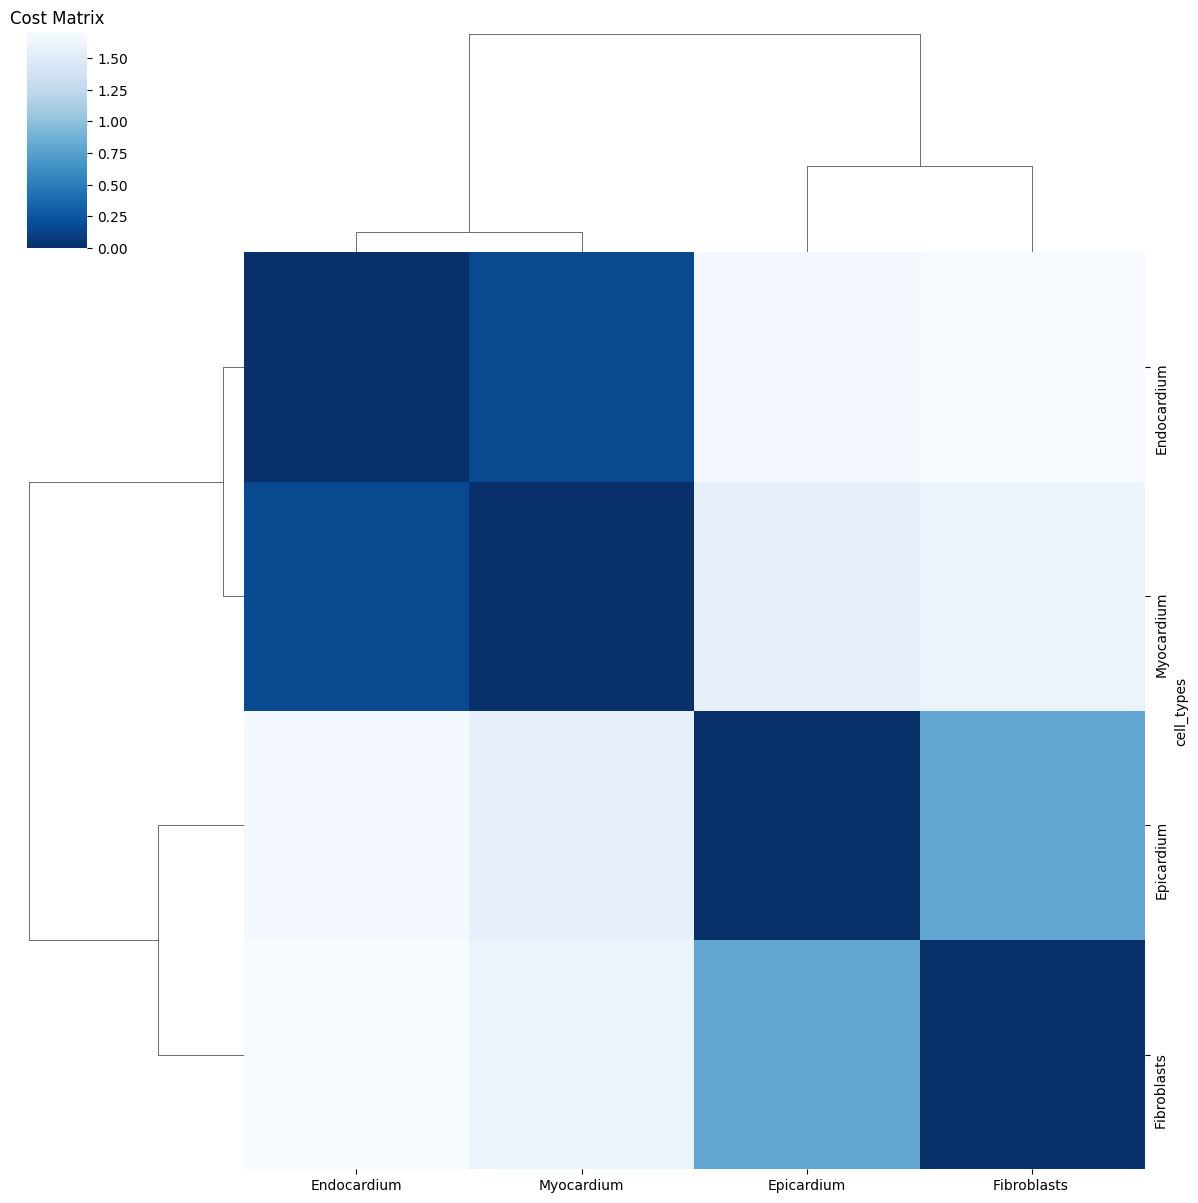

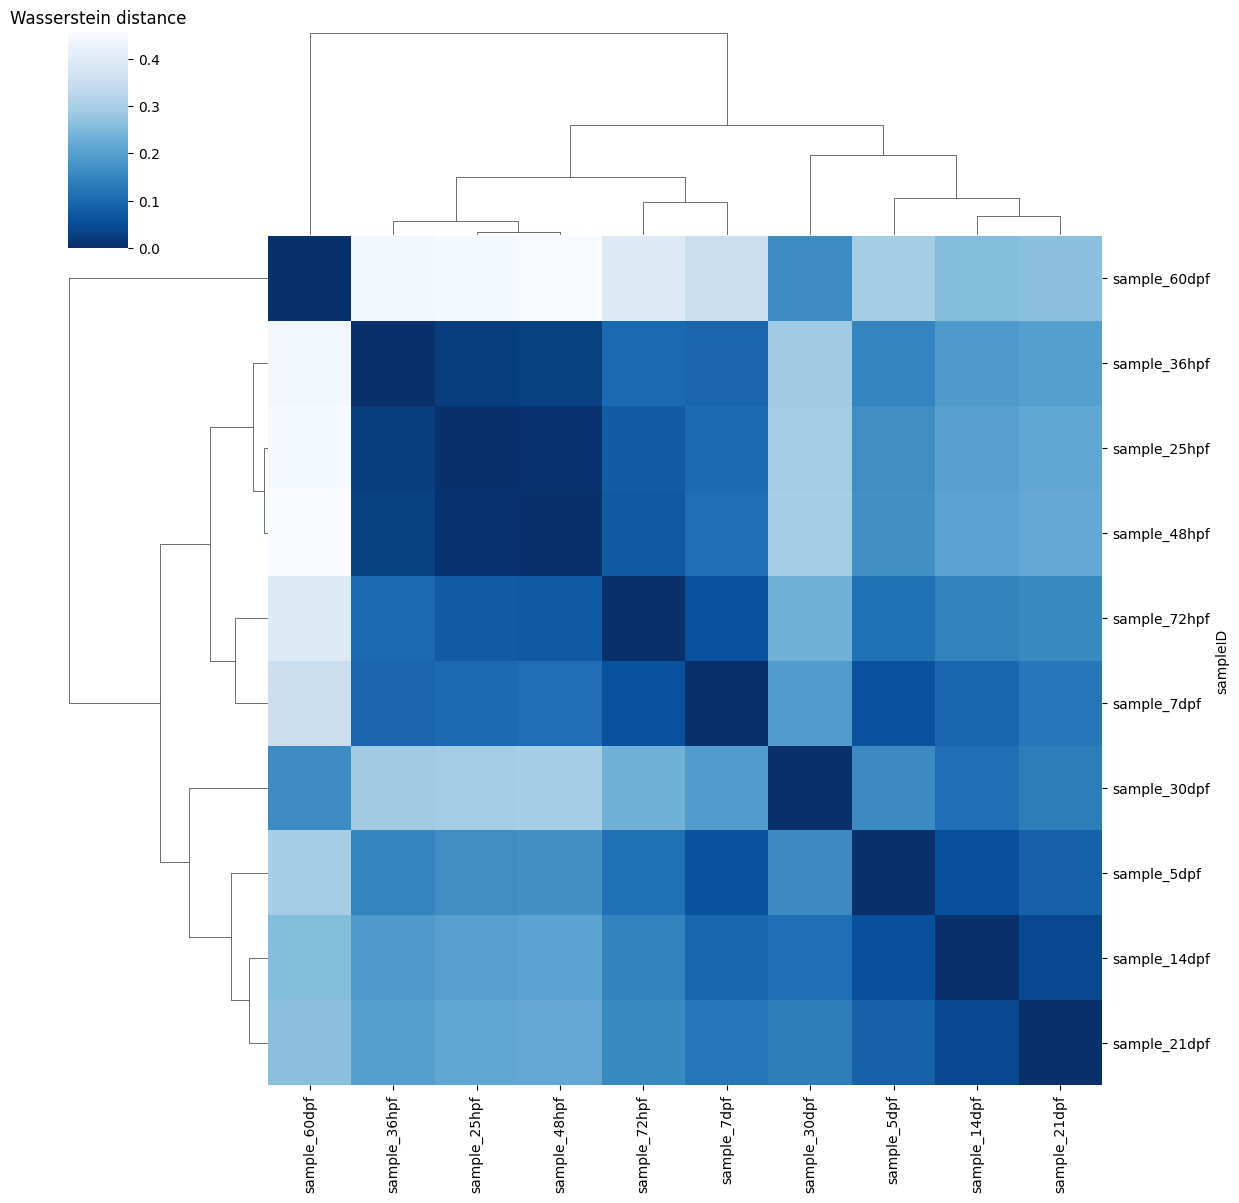

In [6]:
pl.pl.heatmaps(adata)

-----------

## 6. Plotting Diffusion map of Wasserstein distance and estimate the trajectory 

### 6.1 Diffusion map of Wasserstein distance 

<div class="alert alert-block alert-success">

<strong>Here we show the Diffusion map of Wasserstein distance. </strong> 

</div>

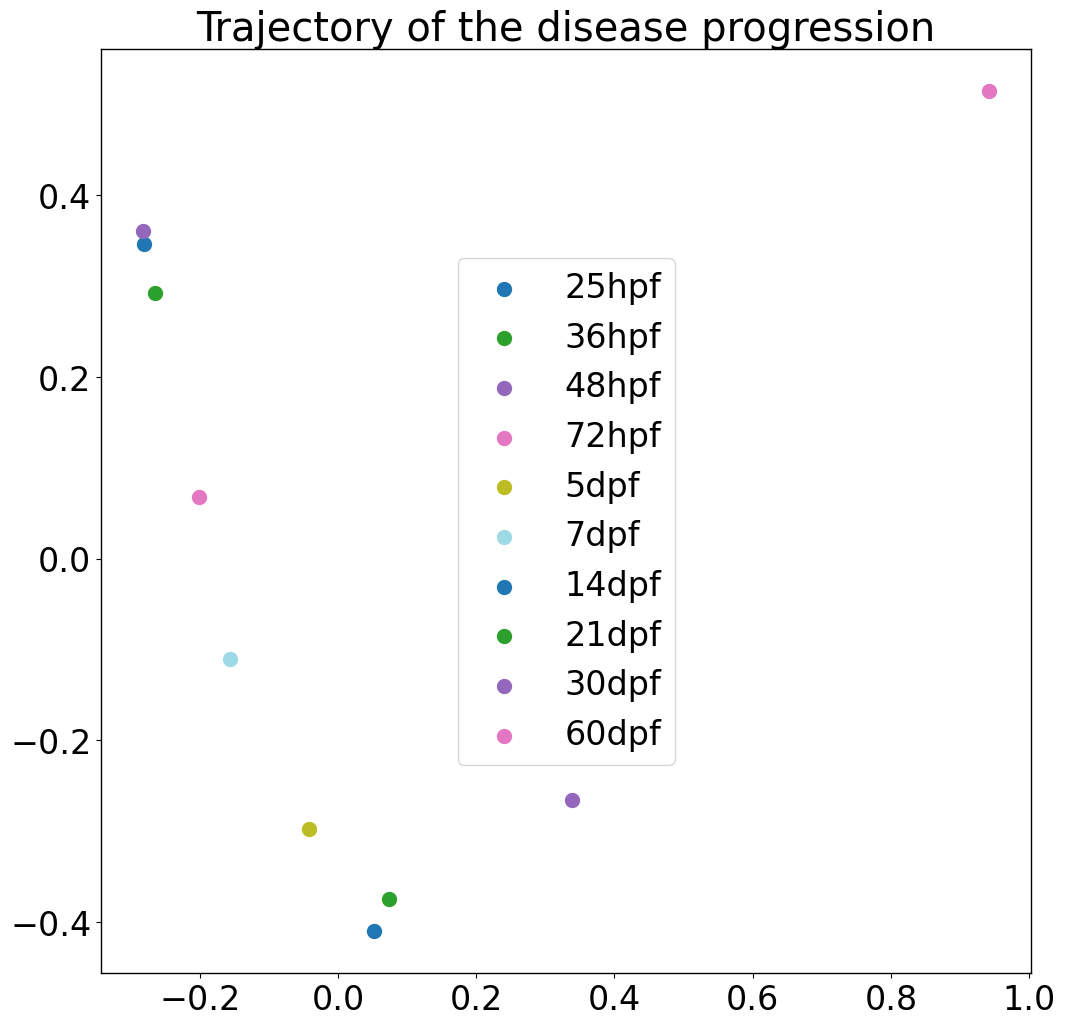

In [7]:
pl.pl.trajectory(adata)

### 6.2 Estimate the timepoints 

<div class="alert alert-block alert-danger">

<strong> which are used as the pseudotime for the following plots! For that, it is important to define the start of the trajectory with the help of the parameter <code>source_node.</code>. 
    

To do this, proceed as follows:
As you can see after starting this cell, this function takes the diffusionmap and compute a principal graph with nodes over it (The red points are the points of the diffusionmap).After that, if you have timepoints look at the diffusionmap and find the starting point. Now look at the nodes and find the node near this point and set it as the <code>source_node.</code> In case of patients samples look where you can find the control/healthy samples, take the node at the end of the graph and set this one as the <code>source_node.</code>
    
    
Pay attention to restart this function and all following ones if you changed the <code>source_node.</code>!
</strong>
</div>

<div class="alert alert-block alert-success">

<strong>Parameters:
    
   <code> NumNodes</code>:The number of nodes you want to use for the principal graph. the higher the number the more the nodes nestle    on the timepoints, which can result into a better estimation.
    
    
  <code>  source_node</code>: The first timepoint or the patient/sample which determine the start of the trajectory.</strong> 
     

</div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

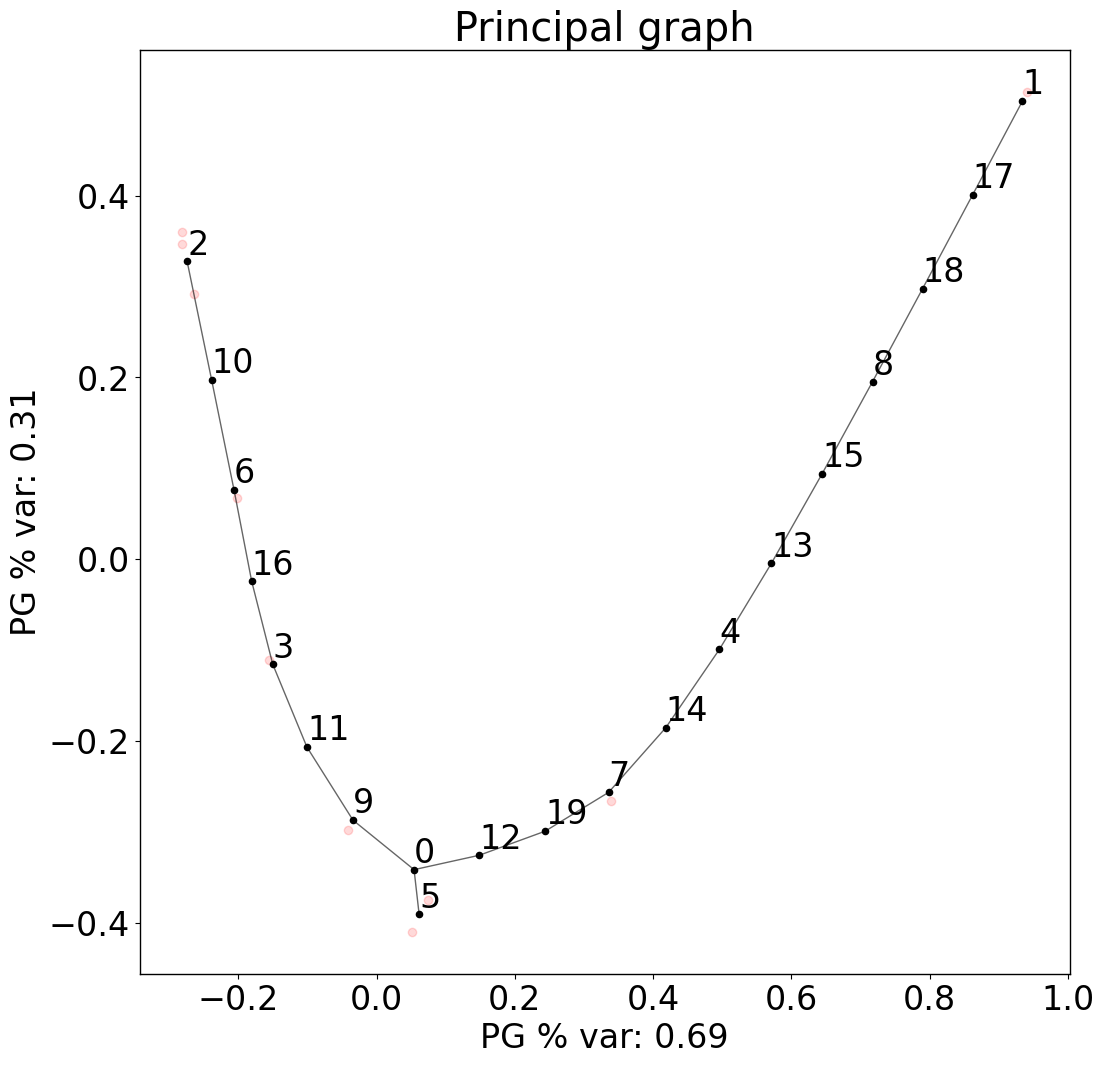

In [8]:
pl.pl.fit_pricipla_graph(adata, NumNodes = 20, source_node = 2)

-----------

## 7 - Cell proportion

<div class="alert alert-block alert-success">

<strong>Next, we can use the robust regression model to find cells whose proportions change linearly or non-linearly with disease progression.</strong> 

</div>

,sampleID,Endocardium,Myocardium,Epicardium,Fibroblasts,Time_score
0,sample_25hpf,0.549630,0.446648,0.003709,0.000013,1
1,sample_48hpf,0.592424,0.405094,0.002465,0.000017,2
...,...,...,...,...,...,...
8,sample_30dpf,0.357002,0.337012,0.097444,0.208542,9
9,sample_60dpf,0.151946,0.384997,0.101693,0.361365,10


,label
0,1
1,2
...,...
8,9
9,10


,0,1,2,3,4,5,6,7,8,9
Endocardium,0.549630,0.592424,0.329359,0.651345,0.357020,0.204879,0.175790,0.254865,0.357002,0.151946
Myocardium,0.446648,0.405094,0.670633,0.272631,0.543700,0.645300,0.619707,0.548040,0.337012,0.384997
Epicardium,0.003709,0.002465,0.000003,0.025779,0.005943,0.011134,0.143589,0.077213,0.097444,0.101693
Fibroblasts,0.000013,0.000017,0.000005,0.050245,0.093336,0.138686,0.060914,0.119883,0.208542,0.361365


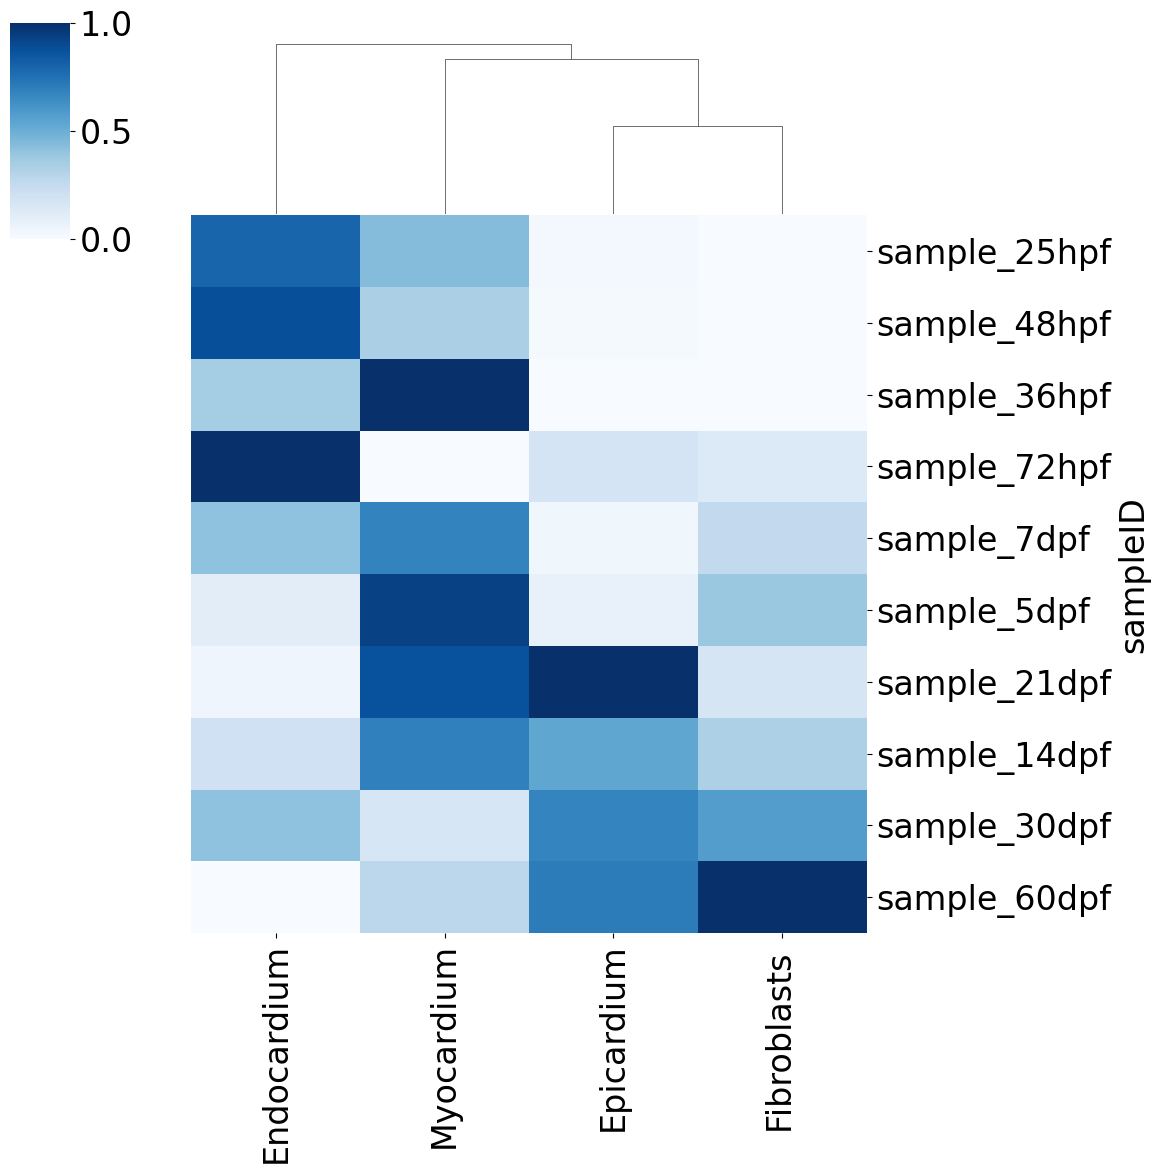

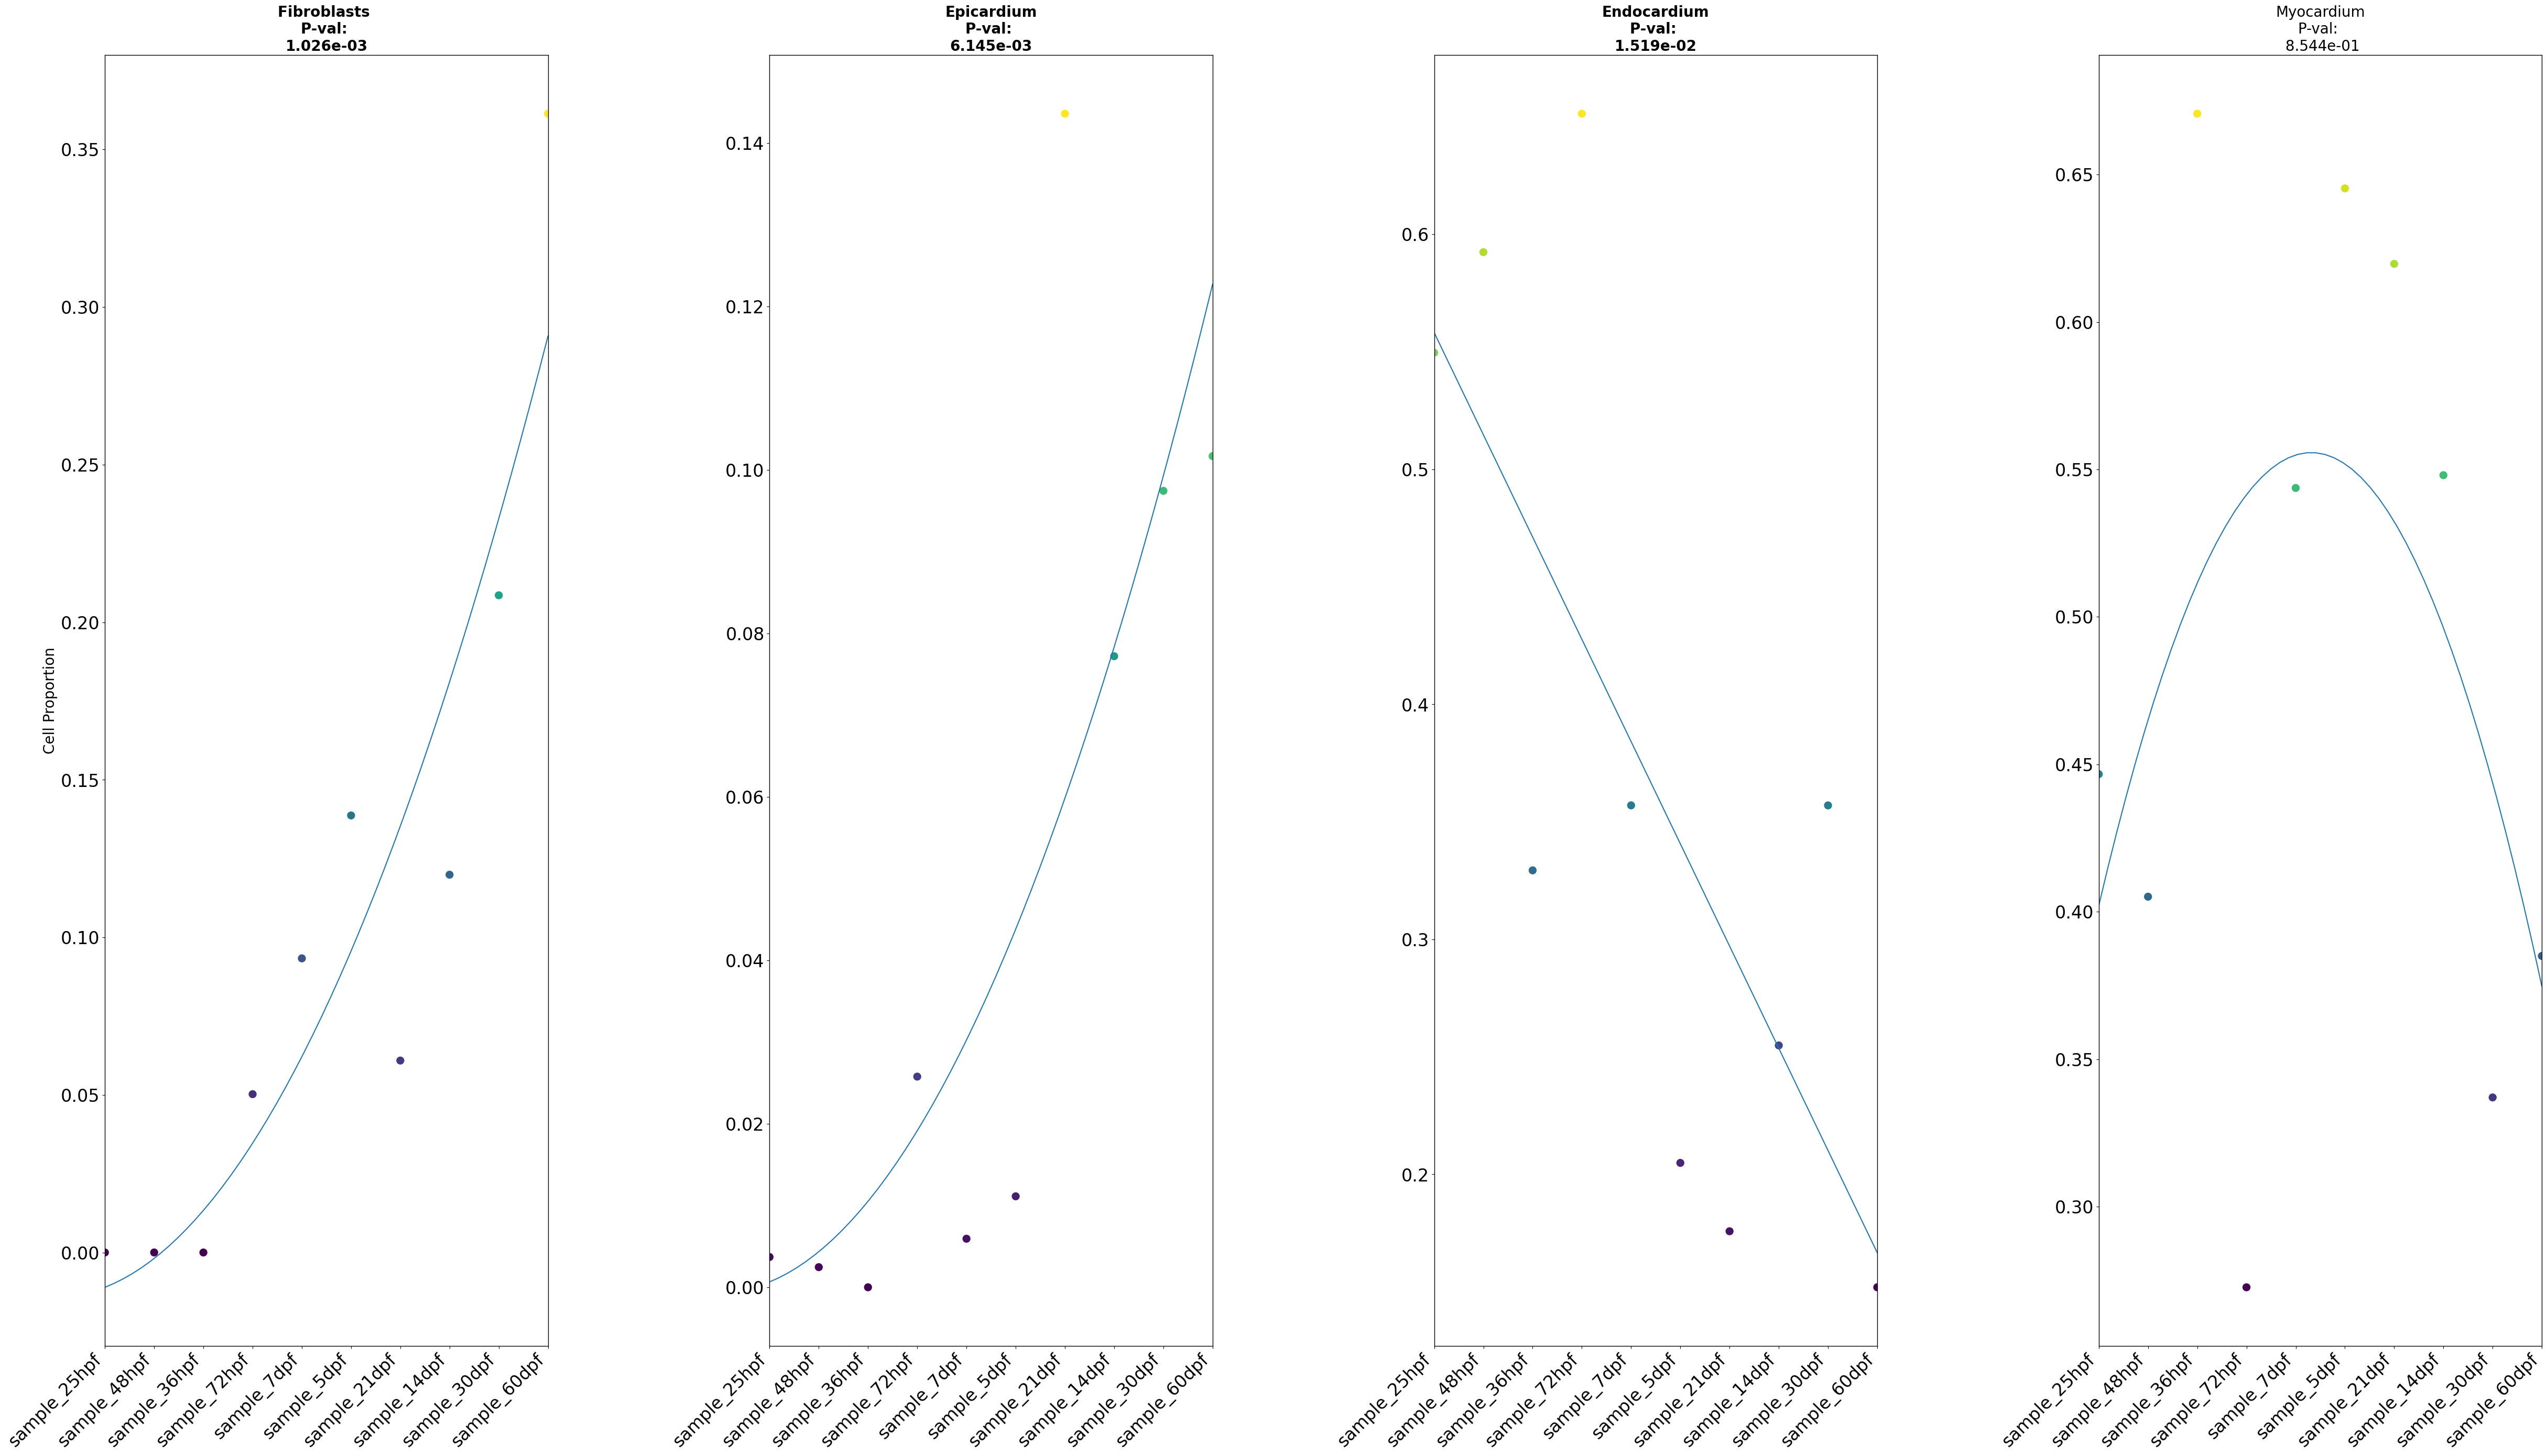

In [9]:
pl.tl.cell_importance(adata,axis="timepoints",organism="drerio",gprofil=True)

-----------

## 8. Finding gene markers for the clusters

### 8.1 Gene selection 

<div class="alert alert-block alert-success"> 
<strong>Given that we found interesting cell types, we would like to investigate genes associated with these trajectories, i.e. genes, whose expression changes linearly or quadratically with the disease progression. 

After running the command, you can find a folder named ‘Markers’ inside the 'Results_PILOT' folder. There, we will have a folder for each cell type. The file ‘Whole_expressions.csv’ contains all statistics associated with genes for that cell type. 
 
- Here, we run the genes_importance function for all cell types.
    
- You need to set names of columns that show cell_types/clusters and Samples/Patients in your object.

    </strong></div>

<div class="alert alert-block alert-danger">

<strong>Note that if you are running this step on a personal computer, it might take time. For one celltype/cluster the computing need around 30-60min.</strong> 

</div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
for cell in adata.uns['cellnames']:
    pl.tl.genes_importance(adata,
                           name_cell = cell,
                           sample_col = 'Sample',
                           col_cell = 'celltypes',
                           plot_genes = False)

### 8.2 Finding specifc marker for given cluster 

<div class="alert alert-block alert-success"> 
<strong> The previous test only finds genes with significant changes over time for a given cell type. However, it does not consider if a similar pattern and expression values are found in other clusters. To further select genes, we use a Wald test that compares the fit of the gene in the cluster vs. the fit of the gene in other clusters.
</strong></div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
pl.tl.gene_cluster_differentiation(adata,cellnames = ['Endocardium','Epicardium'], number_genes = 10)

<div class="alert alert-block alert-success"> 
<strong> Test results are saved in ‘gene_clusters_stats_extend.csv’. To find a final list of genes, we only consider genes with a fold change higher than 0.5, i.e. genes which expression is increased in the cluster at hand; and we sort the genes based on the Wald test p-value. These can be seen bellow.
</strong></div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
df = pl.tl.results_gene_cluster_differentiation(cluster_name = 'Endocardium',).head(10)
df.head(15)

-----------

## 9. Go enrichment 

<div class="alert alert-block alert-success"> 
<strong>
Here is the GO enrichment for  the 50 first top genes (FC >= 0.5 and p-value < 0.01). Plot is saved at Go folder.
</strong></div>

<div class="alert alert-block alert-danger">

<strong>Note that the default organsim for this function is homo sapiens. For all other ones you can use the parameter  <code>organism</code>. Since gprofiler is used for the go enrichment, you need to look up on the website below in order to find the ID for your interest organism which you are hand over to the parameter.
    
Organism-ID für gProfiler:<button type="button" class="btn btn-link">https://biit.cs.ut.ee/gprofiler/page/organism-list </button>
</strong> 

</div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
pl.pl.go_enrichment(df, cell_type = 'Endocardium', organism = "drerio" )

-----------

## 10. Expression pattern of specfic genes

### 10.1 Expression pattern over time 

<div class="alert alert-block alert-success"> 
<strong>
We can visualize the expression pattern of specific genes over time for the given cluster.
</strong></div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
pl.pl.plot_gene_list_pattern(['DYNC2H1', 'NEGR1', 'COL3A1'], 'Myofib')

### 10.2 Comparing expression pattern with other clusters

<div class="alert alert-block alert-success"> 
<strong>
In the plot below, the orange line indicates the fit in the target cell type (shown as orange lines) compared to other cell types (represented by grey lines).
</strong></div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
pl.pl.exploring_specific_genes(cluster_name = 'Endocardium', gene_list = ['tfpia','icn','srgn'])

-----------

## 11. Group specfic genes by pattern

<div class="alert alert-block alert-success"> 
<strong>
Here, we cluster genes based on the pattern found for each and plot their heatmap. Below the heatmap, we depict the pattern of each group's 
genes and top 10 genes having significant changes through disease progression.

You can find curves activities' statistical scores that show the fold changes of the genes through disease progression in the Markers folder for each cell type separately.
</strong></div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
pl.pl.genes_selection_analysis(adata, 'Endocardium', scaler_value = 0.4)

-----------

## 12. Hallmarker genes 

<div class="alert alert-block alert-success"> 
<strong>
Here, we utilize the Enrichr tools to get the hallmarks of the clustered genes. The default dataset is MSigDB_Hallmark_2020, which you can change using the <code>gene_set_library</code> parameter.
</strong></div>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [ ]:
pl.pl.genes_selection_heatmap(adata, 'Epicardium', scaler_value = 0.4)

In [ ]:
pl.pl.plot_hallmark_genes_clusters(adata, 'Epicardium', 'MSigDB_Hallmark_2020')

-----------

## 13. Saving adata